In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import numpy as np
from numpy import sin,cos
from scipy.integrate import solve_ivp
import pyvista as pv

#  Atomic Coherence in E-Mag Field (Dr Blokhina's Model)

### Define system constants:

### Define system DEs as function:

In [2]:
omega = 1
Lambda = 1

In [3]:
def quantum_model(t, x):    
    return [
        -omega*Lambda* (x[0]*x[2])**0.5 *cos(x[3])*(sin(x[1])),  # d(I_e)/dt
        omega -0.5*omega*Lambda* (x[2]/x[0])**0.5 *(cos(x[3])*cos(x[1])),  # d(phi_e)/dt
        2*omega*x[4]*Lambda* (x[0]*x[2])**0.5 *(cos(x[1])*sin(x[3])),  # d(I_m)/dt
        omega*x[4]*Lambda* (x[0]/x[2])**0.5 *(cos(x[3])*cos(x[1])),  # d(phi_m)/dt
        -Lambda* (x[0]*x[2])**0.5 *(cos(x[1])*sin(x[3]))  # d(n)/dt
    ]

### Define time range and initial conditions:

In [4]:
dt = 0.001
t_test = np.arange(0,100,dt)
X0 = [0.5, 0.5, 0.5, 0.5, 1]

### Solve our equations using solve_ivp

In [5]:
sol = solve_ivp(quantum_model, (t_test[0], t_test[-1]), X0, method='BDF', t_eval=t_test) # Integrate
x_test = np.transpose(sol.y)

## Use PyVista to create 2D (Poincaré) cross sections:

### Fit a spline to connect our data points:

In [6]:
spline = pv.Spline(x_test[0::20,[0,3,4]],len(x_test))

### Create the 3D mesh from our spline lines data:

In [7]:
mesh = pv.PolyData(x_test[:,[0,3,4]], lines=spline.lines)
#mesh.plot(show_bounds=True, cpos='xyz', point_size=20)
mesh.plot(render_lines_as_tubes=True, line_width=5)

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Take a 2D slice of our 3D mesh:

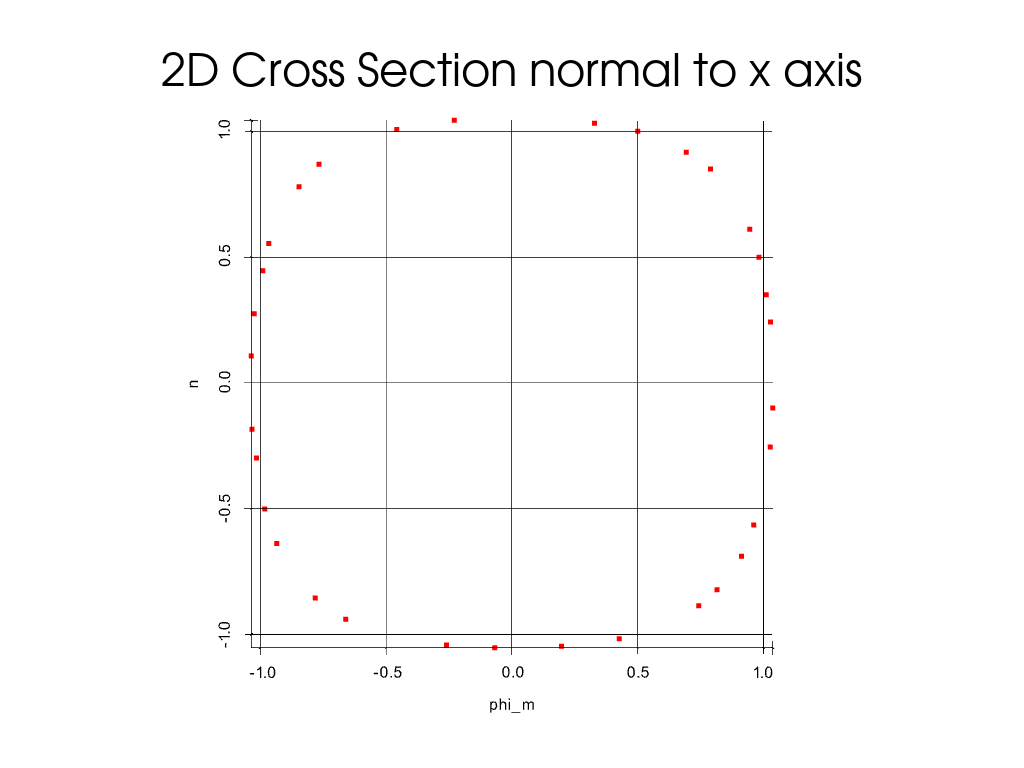

In [9]:
# We define a plane with a normal and an origin:
slices = mesh.slice(normal= 'x', origin=(0.5,0,0))

# Create a plot:
plotter = pv.Plotter()

# Add our slice to the plot:
plotter.add_mesh(slices,color='red')

# Add plot Title:
plotter.add_title('2D Cross Section normal to x axis', color='black')

# Set visualisation paramaters:
plotter.set_background('white')
plotter.camera_position='yz'
plotter.show_grid(color='black', ylabel='phi_m', zlabel='n')
plotter.show(jupyter_backend='static');